# Tugas 4 Pagerank

1.   Buat graph berarah dengan NetworkX (minimal 9 node )
  *   Hitung manual pagerank dari graph yang anda buat
  *   Hitung pagerank menggunakan NetworkX
2.   Implementasikan ulang  https://github.com/Shakunni/Extractive-Text-Summarization/blob/master/extractive_summarizer.ipynb
  *   Jelaskan prosesnya
  *   Upload di github repository webstatis masing masing 

## Menentukan graph dan plot

In [44]:
import networkx as nx

# Create a graph
G = nx.Graph()
G.add_edges_from([(0,2),(0,4),(0,5),(1,7),(2,0),(2,4),(2,5),(3,7),(4,8),(5,1),(5,8),(6,3),(6,8),(7,0),(8,0),(8,1),(8,6)])

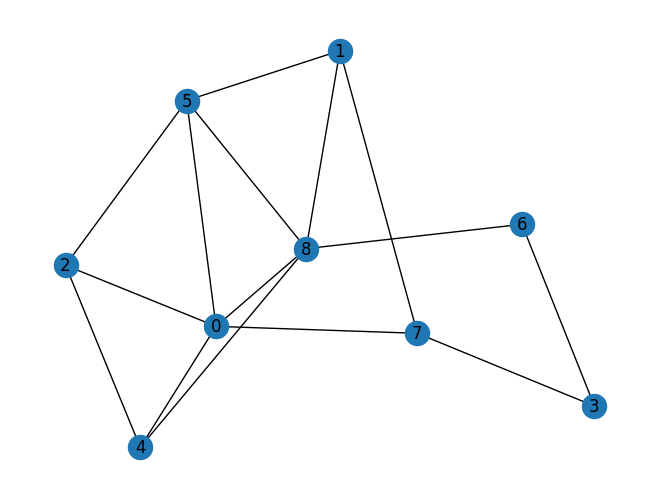

In [45]:
# draw the graph
nx.draw(G, with_labels=True)

## Hitung Pagerank dengan NetworkX

In [46]:
page_rank = nx.pagerank(G, alpha=0.85)
print('NetwrokX PageRank :',page_rank)


NetwrokX PageRank : {0: 0.1558998220673495, 2: 0.09777559041925096, 4: 0.09793266220277633, 5: 0.12639349288132878, 1: 0.10044924344376191, 7: 0.10540541897118083, 3: 0.07946863845888402, 8: 0.15917393983368838, 6: 0.07750119172177906}


## Hitung Pagerank Manual dengan Code Python

In [47]:
import numpy as np


def pagerank(M, alpha=0.85, max_iter=100, tol=1e-6):
    """
    Fungsi untuk menghitung PageRank menggunakan metode iteratif dengan algoritma Power Method.
    
    Parameter:
    M (np.array): Matriks adjacency dari graf yang akan dihitung PageRank-nya.
    alpha (float): Damping factor, default 0.85.
    max_iter (int): Jumlah iterasi maksimum, default 100.
    tol (float): Toleransi kesalahan, default 1e-6.
    
    Return:
    v (np.array): Vektor PageRank.
    """
    n = M.shape[0]
    v = np.ones(n) / n
    M_hat = (alpha * M + (1 - alpha) / n)
    for _ in range(max_iter):
        v_last = v
        v = M_hat @ v
        if np.linalg.norm(v - v_last, 1) < tol:
            break
    return v

In [48]:
# inisialisasi matriks
n = G.number_of_nodes()
M = np.array(nx.adjacency_matrix(G).todense())
M = M / M.sum(axis=0)


# hitung pagerank
v = pagerank(M)
print('Manual PageRank :',v)

Manual PageRank : [0.15590023 0.09777579 0.09793244 0.12639312 0.10044956 0.10540472
 0.07946921 0.1591743  0.07750063]


## Implementasi Text Summarization in Python

In [49]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
!pip install docx2txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
import numpy as np
import PyPDF2
import docx2txt
import sys
from nltk.tokenize.punkt import PunktSentenceTokenizer
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [52]:
# we are going to show an example of how the method is working
# first let's take the document as an input
def readDoc(name):

    # now read the type of document
    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
        # print(name)
    # print(choice)
    # Case 1: if it is a .txt file
        
    if choice == 1:
        f = open(name, 'r', encoding="utf8")
        document = f.read()
        f.close()
            
    # Case 2: if it is a .pdf file
    elif choice == 2:
        pdfFileObj = open(name, 'rb', encoding="utf8")
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    # Case 3: none of the format
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    # print(type(document))
    return document

In [53]:
def tokenize(document):
    # We are tokenizing using the PunktSentenceTokenizer
    # we call an instance of this class as sentence_tokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    
    # tokenize() method: takes our document as input and returns a list of all the sentences in the document
    
    # sentences is a list containing each sentence of the document as an element
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

In [54]:
!pip install sumy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 55.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21696 sha256=3d616169935b9f38f88a153f09fb8266db869572be762c6217899ae99a138964
  Stored in directory: /root/.cache/pip/wheels/64/22/90/b84fcc30e16598db20a0d41340616dbf9b1e82bbcc627b0b33
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=5525ac7611be4073d9b950917397f2d479a1a26b3a5b2af30506a1f77c6c7ee8
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506

In [56]:
import requests
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer
import nltk
nltk.download('punkt')


def readDoc(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        return None

def summarize_document(document, num_sentences=3):
    parser = PlaintextParser.from_string(document, Tokenizer("english"))
    summarizer = LexRankSummarizer()
    summary = summarizer(parser.document, num_sentences)
    summary_text = " ".join([str(sentence) for sentence in summary])
    return summary_text

url = "https://raw.githubusercontent.com/errjak/dataset/main/berita1.txt"
document = readDoc(url)
if document is not None:
    summary = summarize_document(document)
    print('The length of the document is:', len(document))
    print('Summary:')
    print(summary)

    # Simpan ringkasan ke file
    with open('ringkasan.txt', 'w') as file:
        file.write(summary)

    print('Ringkasan telah disimpan dalam file "ringkasan.txt"')
else:
    print('Failed to retrieve the document.')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


The length of the document is: 2169
Summary:
Kritikan itu membuat heboh karena pemilik akun itu menyebut Lampung sebagai Dajjal. Melansir detikFinance, Lampung yang kini menjadi sorotan karena jalan rusak itu ternyata hanya menganggarkan dana senilai Rp 72.445.048.520 (Rp 72,44 miliar) untuk pemeliharaan jalan. Padahal dalam Pasal 8 Pergub yang sama, dijelaskan bahwa anggaran belanja daerah tahun anggaran 2023 prov.
Ringkasan telah disimpan dalam file "ringkasan.txt"
